In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import minimize

# SIR Model

In [2]:
# Initialize S,I,R values
N = 1000
I0 = 1
R0 = 0
S0 = N - I0 - R0
y0 = S0, I0, R0

# Initialize infection/recovery rate
beta = 0.3/N
gamma = 0.2

In [3]:
# Defining the vector dydt
def dydt(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Solving ODE
t = np.arange(0, 120, 1)
S, I, R = np.transpose(odeint(dydt, y0, t, args=(N, beta, gamma)))

In [4]:
def PlotSIR():
    plt.plot(t, S, 'b', label='Susceptible')
    plt.plot(t, I, 'r', label='Infected')
    plt.plot(t, R, 'g', label='Removed')
    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.legend()

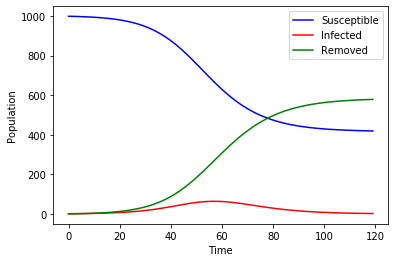

In [5]:
PlotSIR()

In [6]:
# Adding random positive errors to every 5th data point
sd = 50
S_data = S[::5] + np.array(abs(np.random.normal(0, sd, 24)))
I_data = I[::5] + np.array(abs(np.random.normal(0, sd, 24)))
R_data = R[::5] + np.array(abs(np.random.normal(0, sd, 24)))

In [7]:
# Error function for an SIR model
def ErrorSIR(params):
    S, I, R = np.transpose(odeint(dydt, y0, t, args=tuple([1000] + list(params))))
    error = sum((S_data - S[::5])**2) + sum((I_data - I[::5])**2) + sum((R_data - R[::5])**2)
    return error

In [8]:
# Minimizing estimates for beta and gamma
guess = [0.3/1000, 0.2]
min_params = minimize(ErrorSIR, guess)
min_params.x

array([0.00029416, 0.19503465])

In [9]:
S_model, I_model, R_model = np.transpose(odeint(dydt, y0, t, args=tuple([N] + list(min_params.x))))

In [10]:
def PlotSIR_model():
    plt.plot(t[::5], S_data, 'b.', label='Susceptible data')
    plt.plot(t[::5], I_data, 'r.', label='Infected data')
    plt.plot(t[::5], R_data, 'g.', label='Removed data')
    plt.plot(t, S_model, 'b', alpha = 0.2, label='Susceptible fit')
    plt.plot(t, I_model, 'r', alpha = 0.2, label='Infected fit')
    plt.plot(t, R_model, 'g', alpha = 0.2, label='Removed fit')
    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.legend()

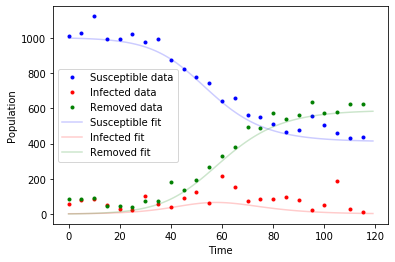

In [11]:
PlotSIR_model()

# SEIR model

In [12]:
# Initialize S,E,I,R values
N = 1000
E0 = 1
I0 = 0
R0 = 0
S0 = N - E0 - I0 - R0
y0 = S0, E0, I0, R0

# Initialize infection/recovery rate
beta = 0.6/N
gamma = 0.1
sigma = 0.1

In [13]:
# Defining the vector dydt
def dydt(y, t, N, beta, gamma, sigma):
    S, E, I, R = y
    dSdt = -beta * S * I
    dEdt = beta * S * I - sigma * E 
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

# Solving ODE
t = np.arange(0, 120, 1)
S, E, I, R = np.transpose(odeint(dydt, y0, t, args=(N, beta, gamma, sigma)))

In [14]:
def PlotSEIR():
    plt.plot(t, S, 'b', label='Susceptible')
    plt.plot(t, E, 'y', label='Exposed')
    plt.plot(t, I, 'r', label='Infected')
    plt.plot(t, R, 'g', label='Removed')
    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.legend()

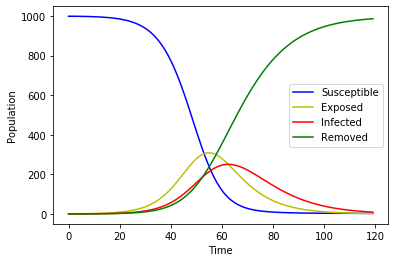

In [15]:
PlotSEIR()

In [16]:
# Adding random positive errors to every 5th data point
sd = 30
S_data = S[::5] + np.array(abs(np.random.normal(0, sd, 24)))
E_data = E[::5] + np.array(abs(np.random.normal(0, sd, 24)))
I_data = I[::5] + np.array(abs(np.random.normal(0, sd, 24)))
R_data = R[::5] + np.array(abs(np.random.normal(0, sd, 24)))

In [17]:
# Error function for an SIR model
def ErrorSEIR(params):
    S, E, I, R = np.transpose(odeint(dydt, y0, t, args=tuple([1000] + list(params))))
    error = sum((S_data - S[::5])**2) + sum((E_data - E[::5])**2) + sum((I_data - I[::5])**2) + sum((R_data - R[::5])**2)
    return error

In [18]:
def PlotSEIR_model():
    plt.plot(t[::5], S_data, 'b.', label='Susceptible data')
    plt.plot(t[::5], E_data, 'y.', label='Exposed data')
    plt.plot(t[::5], I_data, 'r.', label='Infected data')
    plt.plot(t[::5], R_data, 'g.', label='Removed data')
    plt.plot(t, S_model, 'b', alpha = 0.2, label='Susceptible fit')
    plt.plot(t, E_model, 'y', alpha = 0.2, label='Exposed fit')
    plt.plot(t, I_model, 'r', alpha = 0.2, label='Infected fit')
    plt.plot(t, R_model, 'g', alpha = 0.2, label='Removed fit')
    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))

In [19]:
# Minimizing estimates for beta, gamma and sigma
guess = [0.6/1000, 0.1, 0.1] # true parameter values
min_params = minimize(ErrorSEIR, guess)
min_params.x

array([0.00058558, 0.09867184, 0.10275606])

In [20]:
S_model, E_model, I_model, R_model = np.transpose(odeint(dydt, y0, t, args=tuple([N] + list(min_params.x))))

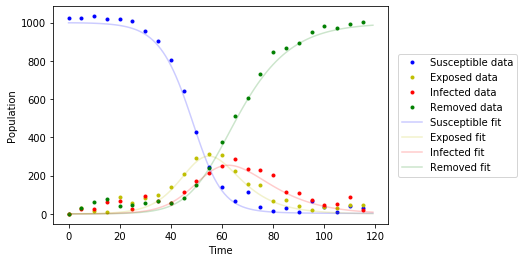

In [21]:
PlotSEIR_model()

# Fitting A Countries data to a SIR model (Attempt 1)

# Fitting A Countries data to a SIR model (Attempt 2)

In [22]:
df = pd.read_csv("WHO-COVID-19-global-data.csv")

In [23]:
# Populations to 3sf
SE_N = 10200000
NO_N =  5370000
FI_N =  5520000
DK_N =  5810000

# Country codes SE = Sweden, NO = Norway, FI = Finland, DK = Denmark
SE_I = np.array(df.Cumulative_cases[df.Country_code == "SE"])/SE_N
NO_I = np.array(df.Cumulative_cases[df.Country_code == "NO"])/NO_N
FI_I = np.array(df.Cumulative_cases[df.Country_code == "FI"])/FI_N
DK_I = np.array(df.Cumulative_cases[df.Country_code == "DK"])/DK_N

In [24]:
# Truncating to start from 10^-6
pos = np.argmax(SE_I > 1e-6)
SE_I = SE_I[pos:]
pos = np.argmax(NO_I > 1e-6)
NO_I = NO_I[pos:]
pos = np.argmax(FI_I > 1e-6)
FI_I = FI_I[pos:]
pos = np.argmax(DK_I > 1e-6)
DK_I = DK_I[pos:]

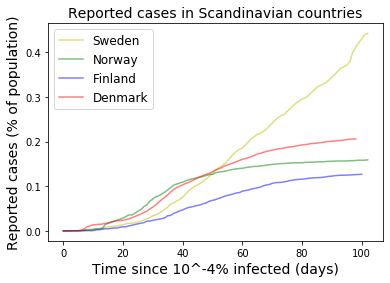

In [43]:
# plt.figure(figsize=(8, 4.8))
plt.plot(SE_I*100, label = "Sweden", color="y", alpha = 0.5)
plt.plot(NO_I*100, label = "Norway", color="g", alpha = 0.5)
plt.plot(FI_I*100, label = "Finland", color="b", alpha = 0.5)
plt.plot(DK_I*100, label = "Denmark", color="r", alpha = 0.5)

plt.title("Reported cases in Scandinavian countries", fontsize=14)
plt.xlabel("Time since 10^-4% infected (days)", fontsize=14)
plt.ylabel("Reported cases (% of population)", fontsize=14)
plt.legend(fontsize=12);

In [41]:
SE_I[-1]

0.0044248039215686276

In [26]:
# Initialize S,E,I,R values
N = 1
E0 = 0
I0 = 1e-6
R0 = 0
S0 = N - E0 - I0 - R0
y0 = S0, E0, I0, R0

# Defining the vector dydt
def dydt(y, t, N, beta, gamma, sigma):
    S, E, I, R = y
    dSdt = -beta * S * I
    dEdt = beta * S * I - sigma * E 
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

In [27]:
def PlotSEIR_model(data, model, color):
    t = np.arange(1, len(data) + 1, 1)
    plt.plot(t, data, 'r.', label='Infected data', color = color)
    plt.plot(t, model, 'r', alpha = 0.2, label='Infected fit', color = color)

In [28]:
# Error function for an SEIR model
def ErrorSEIR(params, data = DK_I):
    t = np.arange(1, len(data) + 1, 1)
    I = np.transpose(odeint(dydt, y0, t, args=tuple([1] + list(params))))[2]
    error = sum((data - I)**2)
    if min(params) < 0:
        return 1e100
    else: return error

In [29]:
# Error function for an SEIR model
def ErrorSEIR(params, data = SE_I, days = 60):
    t = np.arange(1, days+1, 1)
    I = np.transpose(odeint(dydt, y0, t, args=tuple([1] + list(params))))[2]
    error = sum((data[:days] - I)**2)
    if min(params) < 0:
        return 1e100
    else: return error

In [30]:
# Minimizing estimates for beta, gamma and sigma
guess = [0.4, 0.1, 0.1]
min_params = minimize(ErrorSEIR, guess)
t = np.arange(1, len(SE_I) + 1, 1)
SE_I_model = np.transpose(odeint(dydt, y0, t, args=tuple([1] + list(min_params.x))))[2]
min_params.x

array([0.41727674, 0.06214507, 0.13782835])

In [31]:
# Minimizing estimates for beta, gamma and sigma
guess = [0.4, 0.1, 0.1]
min_params = minimize(ErrorSEIR, guess)
t = np.arange(1, len(NO_I) + 1, 1)
NO_I_model = np.transpose(odeint(dydt, y0, t, args=tuple([1] + list(min_params.x))))[2]
min_params.x

array([0.41727674, 0.06214507, 0.13782835])

In [32]:
# Minimizing estimates for beta, gamma and sigma
guess = [0.4, 0.1, 0.1]
min_params = minimize(ErrorSEIR, guess)
t = np.arange(1, len(FI_I) + 1, 1)
FI_I_model = np.transpose(odeint(dydt, y0, t, args=tuple([1] + list(min_params.x))))[2]
min_params.x

array([0.41727674, 0.06214507, 0.13782835])

In [33]:
# Minimizing estimates for beta, gamma and sigma
guess = [0.4, 0.1, 0.1]
min_params = minimize(ErrorSEIR, guess)
t = np.arange(1, len(DK_I) + 1, 1)
DK_I_model = np.transpose(odeint(dydt, y0, t, args=tuple([1] + list(min_params.x))))[2]
min_params.x

array([0.41727674, 0.06214507, 0.13782835])

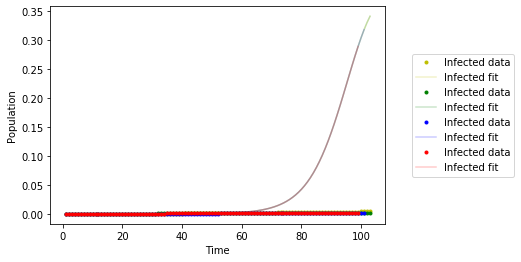

In [34]:
PlotSEIR_model(SE_I, SE_I_model, color = "y")
PlotSEIR_model(NO_I, NO_I_model, color = "g")
PlotSEIR_model(FI_I, FI_I_model, color = "b")
PlotSEIR_model(DK_I, DK_I_model, color = "r")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))